In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("winequality-red.csv")
X = dataset.iloc[: , 1:-1].values
y = dataset.iloc[: , -1].values

In [4]:
from imblearn.over_sampling import SMOTE
X_res, y_res= SMOTE().fit_resample(X, y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

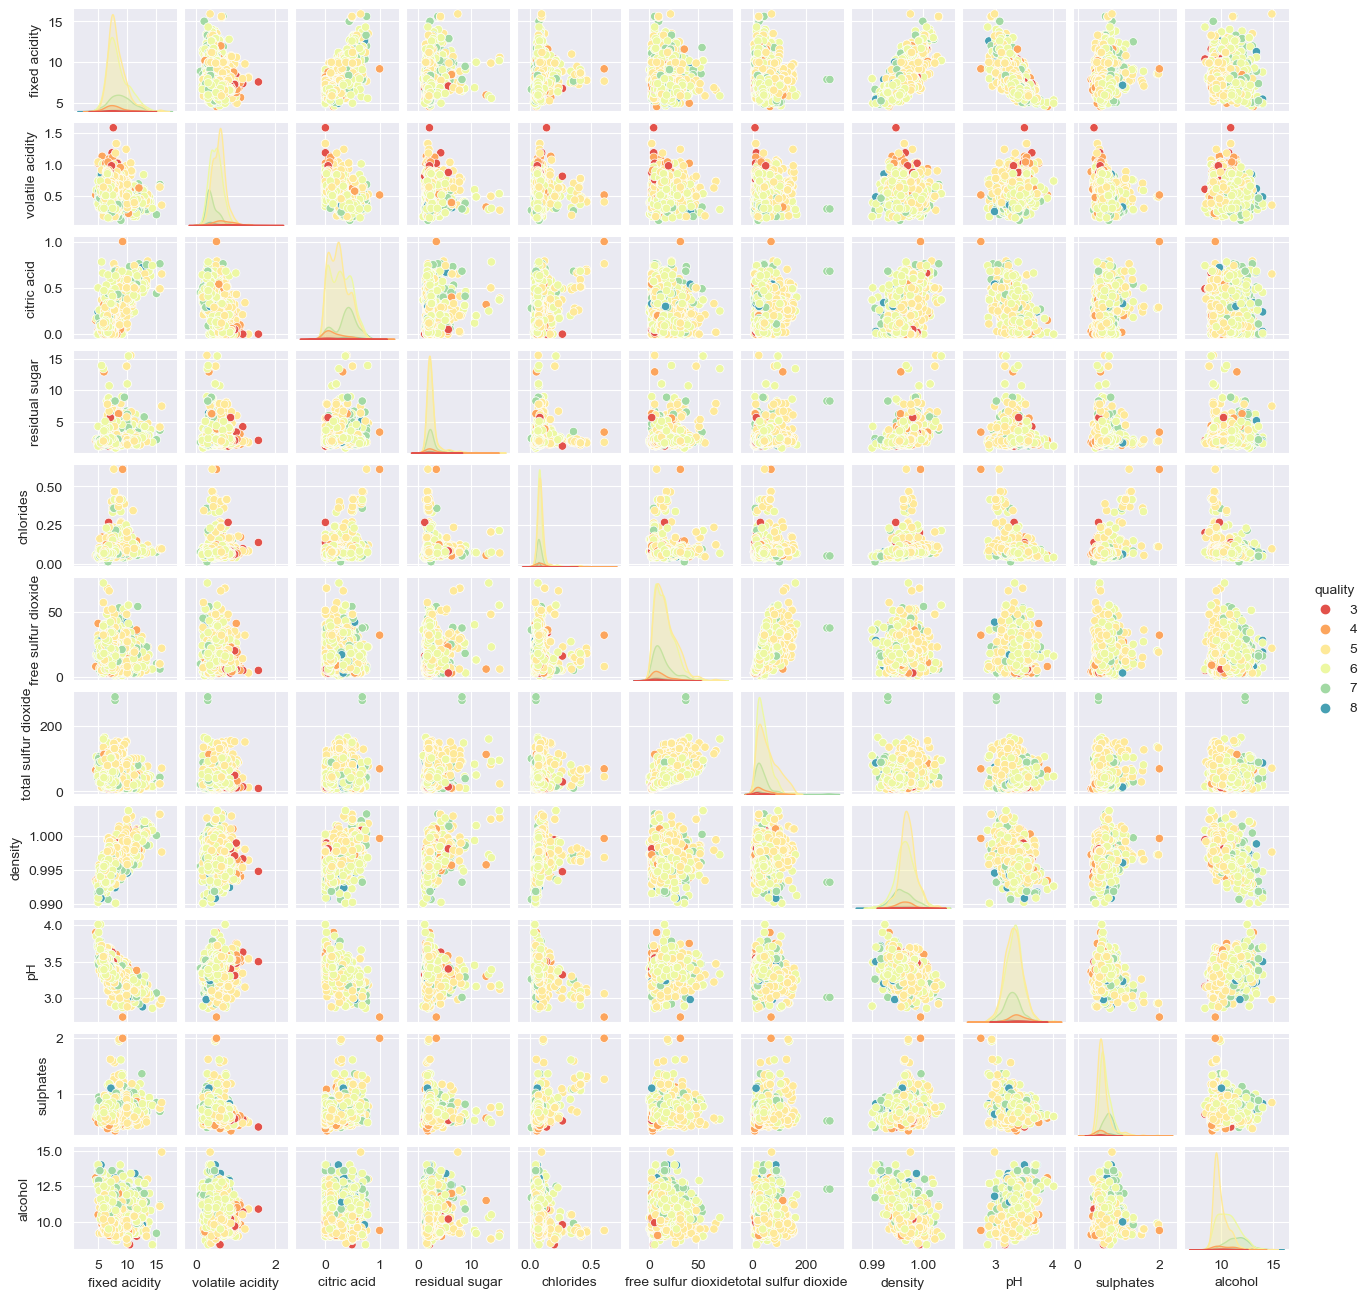

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("Spectral")
sns.pairplot(dataset , hue='quality', palette=palette, height=1.2, diag_kind = 'kde')
plt.show()

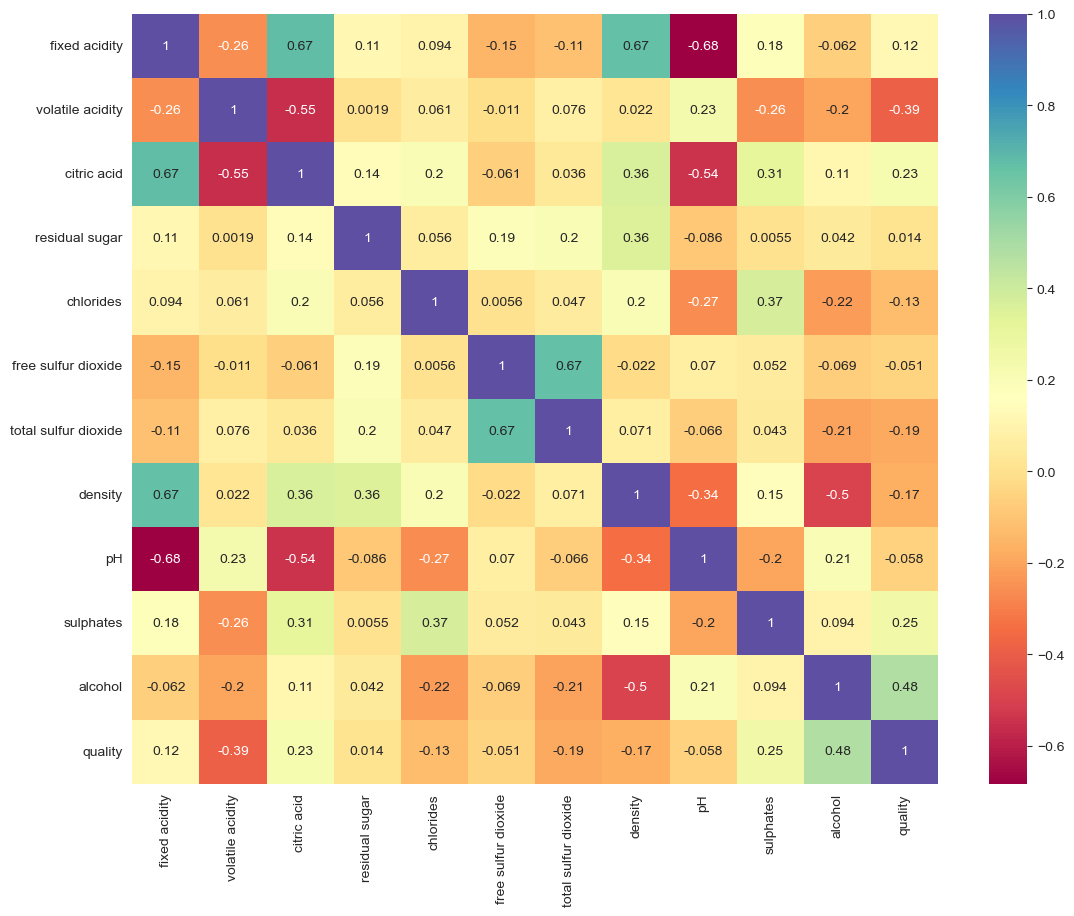

In [8]:
plt.figure(figsize=(13, 10))
sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [3 3]
 [4 4]
 ...
 [4 4]
 [4 4]
 [8 8]]


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[125   1   0   0   0   0]
 [  0 124   2   1   0   0]
 [  4   7 114  21   3   1]
 [  3   2  31  83  21   5]
 [  0   0   0   9 121   2]
 [  0   0   0   0   2 136]]


0.8594132029339854

1